In [14]:
import pandas as pd
from collections import Counter
from langdetect import detect
import langdetect
import numpy as np
import importlib
import os
current_dir = os.getcwd()
%cd ..
import textmining.text_miner 
import textmining.loader  as loader
import textmining.topic_modeler as tm
import textmining.significance_testing as significance_testing
import textmining.utility as utility
import textmining.analysis as analysis

importlib.reload(textmining.text_miner)
importlib.reload(textmining.topic_modeler)
importlib.reload(textmining.analysis)
os.chdir(current_dir)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df = pd.read_json('../data/articles_with_adu_liwc_lexicons_content.json', orient='records')
df.set_index('idx', inplace=True)


In [8]:
training_df, test_df = analysis.get_train_test(data)

In [11]:
numeric_features_list = list(training_df.select_dtypes(include=[np.number]))
utility.create_dirs('../out/significance/')
liberal_significance = significance_testing.significance(training_df, features = numeric_features_list, 
                                   save = True, desc='../out/significance/liberal_trainset', 
                                   independent_var='liberal_majority',
                                   p_value_threshold = 0.05)
print()
conservative_significance = significance_testing.significance(training_df, features = numeric_features_list, 
                                   save = True, desc='../out/significance/conservative_trainset', 
                                   independent_var='conservative_majority',
                                   p_value_threshold = 0.05)

data has 783 instances
bonforrini_threshold:  0.016666666666666666
exception for feature  All numbers are identical in kruskal
exception for feature  invalid value encountered in greater
liwc_scores_categories_Exclam
INNER EXCEPTION All numbers are identical in mannwhitneyu
liwc_scores_categories_Quote
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma2_hedg fund
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_arm servic committe
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_bigger better bottl
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_bruno senat major
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_electron vote machin
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_leader sheldon silver
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_major leader sheldon
INNER EXCEPTION All numbers are identical in mannwhitneyu
lemma3_silver assembl speaker
INNER EXCEPTION All n

In [12]:
liberal_effectsize_filtered = analysis.get_sign_features_hm(liberal_significance )
conservative_effectsize_filtered = analysis.get_sign_features_hm(conservative_significance )

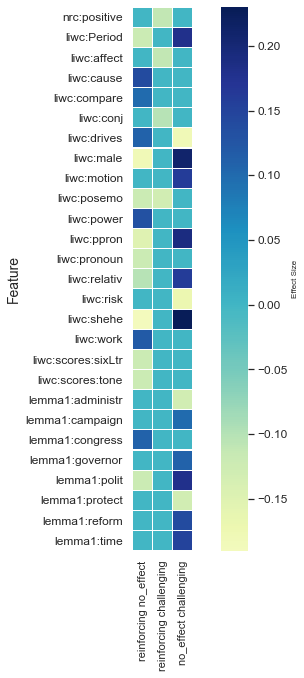

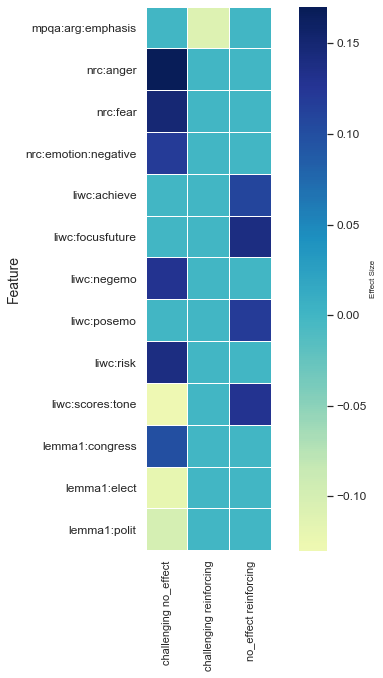

In [13]:
#'Extreme Ideology - Effect Size (Whole Editorial)'
analysis.plot_hm(liberal_effectsize_filtered, 
        filename='heatmap_effectsize_liberal.pdf' )

#'lean Ideology - Effect Size (Whole Editorial)'
analysis.plot_hm(conservative_effectsize_filtered, 
        filename='heatmap_effectsize_conservative.pdf' )